In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.datasets import make_blobs

In [67]:
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,
    n_features=2,
    centers=centroids,
    cluster_std=cluster_std,
    random_state = 2)

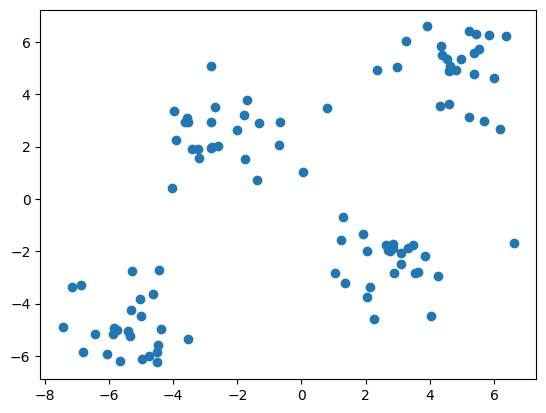

In [69]:
plt.scatter(X[:,0],X[:,1])
plt.show()

**1. Decide Clusters**

**2. Select random centroids**

**3. Assign clusters**

**4. Move centroids**

**5. check finish**

In [99]:
class KMeans:
    def __init__(self,n_clusters = 2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        
        for i in range(self.max_iter):
            #Assign clusters
            cluster_group = self.assign_clusters(X)
            
            #Move centroids
            
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X,cluster_group)
            
            #check finish
            if (old_centroids == self.centroids).all():
                break
                
        return cluster_group

    
    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))

            min_distance = min(distances)
            index_pos = distances.index(min(distances))
            cluster_group.append(index_pos) 
            distances.clear()
                
        return np.array(cluster_group)
            


    def move_centroids(self,X,cluster_group):
        
        new_centroids = []
        
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis = 0))

        return np.array(new_centroids)


In [100]:
km = KMeans(n_clusters = 2,max_iter =100)
km.fit_predict(X)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

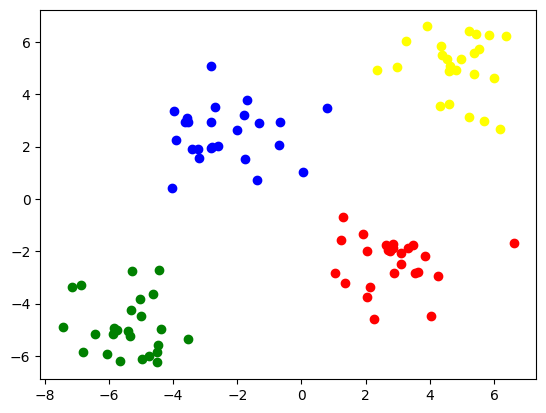

In [101]:
km = KMeans(n_clusters=4,max_iter=500)
y_pred = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

In [80]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


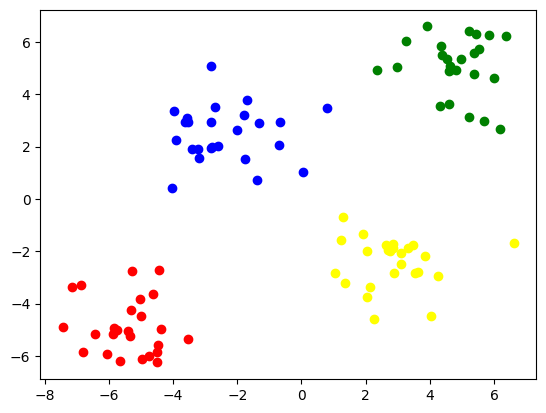

In [81]:
km = KMeans(n_clusters=4,max_iter=100)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

**DataSets**

In [3]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\student_clustering.csv")

In [4]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
    

In [7]:
wcss

[29957.898288,
 4184.14127,
 2503.397581,
 681.96966,
 523.7131894763966,
 388.8524026875981,
 351.8492527559742,
 233.54082485509016,
 205.23783248261395,
 185.25996984962404]

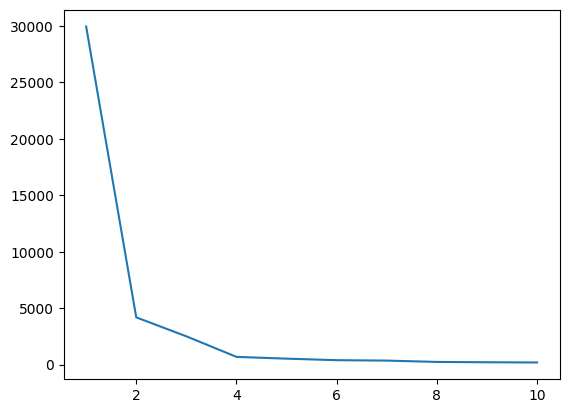

In [8]:
plt.plot(range(1,11),wcss)

In [9]:
X = df.iloc[:,:].values
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(X)

In [10]:
y_means

array([1, 3, 2, 2, 3, 3, 2, 0, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 3, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3, 1, 3, 1, 2, 2, 1,
       0, 0, 2, 3, 0, 3, 1, 1, 0, 2, 0, 3, 3, 0, 3, 0, 3, 2, 2, 0, 1, 0,
       2, 1, 3, 2, 3, 0, 2, 1, 3, 0, 3, 0, 1, 2, 2, 0, 3, 1, 0, 1, 0, 3,
       0, 3, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 3, 3, 2, 0, 2, 3, 0, 1, 1, 3, 2, 0, 2, 1, 2, 3, 1, 2, 2, 3,
       1, 1, 3, 0, 3, 1, 2, 2, 2, 1, 3, 1, 1, 0, 1, 0, 3, 1, 0, 1, 0, 0,
       1, 2, 3, 0, 3, 2, 1, 0, 3, 2, 0, 1, 3, 1, 1, 0, 0, 3, 0, 1, 1, 2,
       0, 3, 1, 0, 0, 3, 3, 3, 2, 1, 2, 2, 0, 3, 2, 2, 1, 1, 2, 1, 0, 3,
       3, 0], dtype=int32)

In [11]:
X[y_means == 3,1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

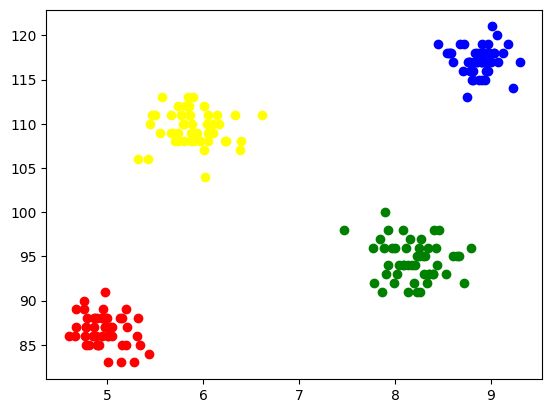

In [21]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color = 'blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], color = 'red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], color = 'green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1], color = 'yellow')

In [18]:
new = (np.array([9.13,88]).reshape(1,-1))

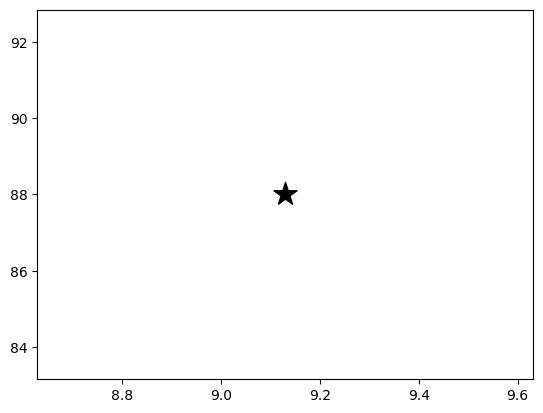

In [19]:
plt.scatter(new[:, 0], new[:, 1], color='black', marker='*', s=300, label='New Data Point')

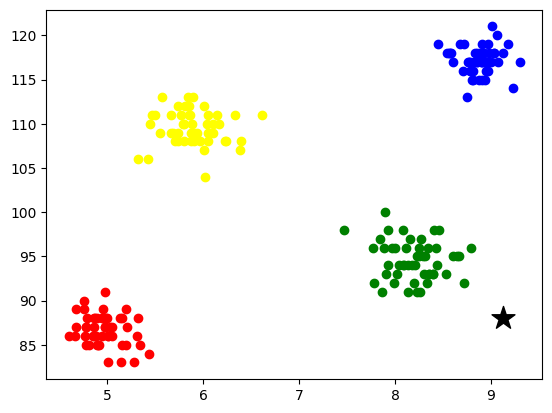

In [22]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color = 'blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], color = 'red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], color = 'green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1], color = 'yellow')
plt.scatter(new[:, 0], new[:, 1], color='black', marker='*', s=300, label='New Data Point')

In [23]:
plt.scatter(new[:, 0], new[:, 1], color='black', marker='*', s=300, 
            label=f'New Data (Cluster {predicted_cluster})')

NameError: name 'predicted_cluster' is not defined